# Zadanie 1

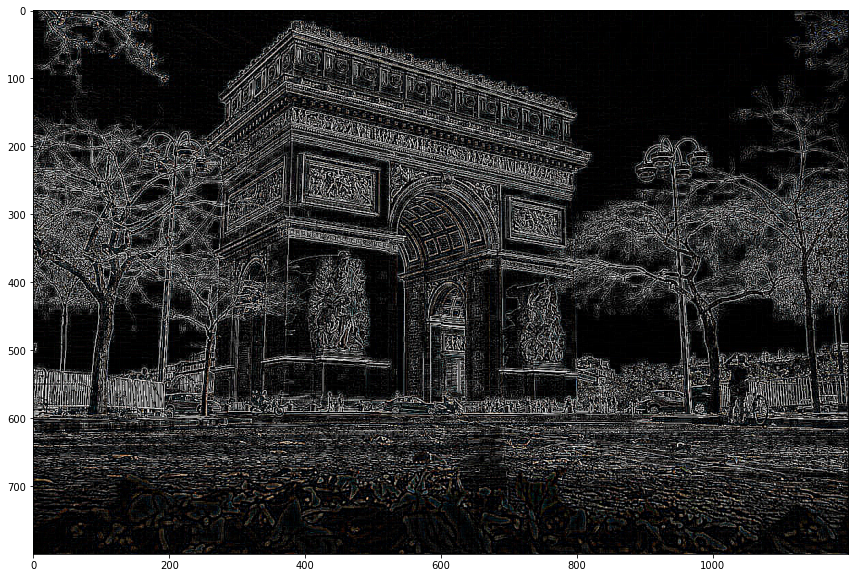

In [94]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18, 10)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
]

kernel = np.asarray(kernel)

filtered_image = cv.filter2D(image, -1, kernel=kernel)
plt.imshow(filtered_image)

# Zadanie 2

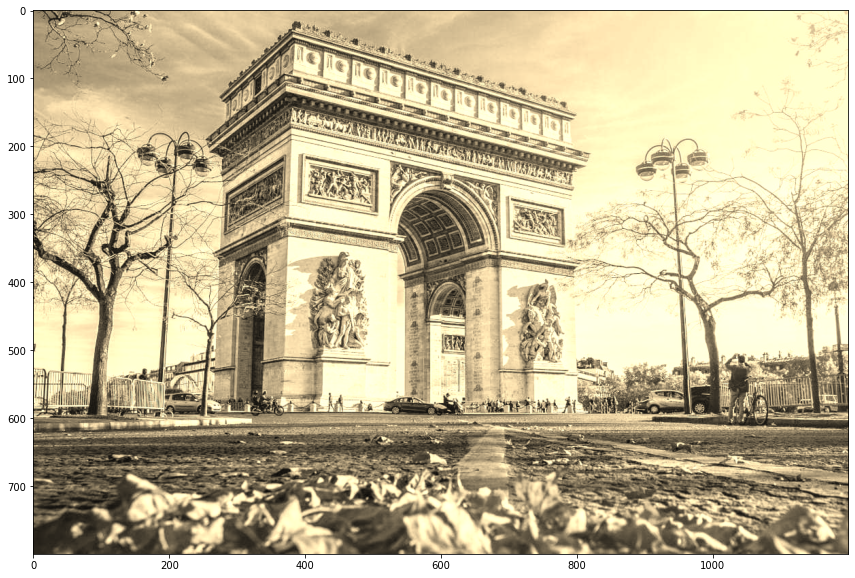

In [95]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18, 10)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

new_image = np.array(image, dtype='float32')
new_image /= 255

matrix = [
    [0.393, 0.349, 0.272],
    [0.769, 0.689, 0.534],
    [0.189, 0.168, 0.131],
]

new_image = np.dot(new_image, matrix)

for i in range(len(new_image)):
    for j in range(len(new_image[i])):        
        for z in range(len(new_image[i][j])):            
            if new_image[i][j][z] > 1:
                new_image[i][j][z] = 1

plt.imshow(new_image)

# Zadanie 3

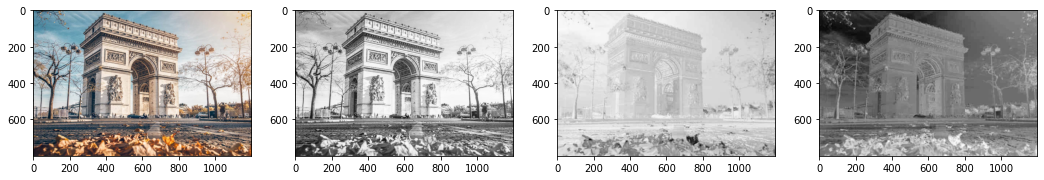

In [96]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18, 10)
fig, ax = plt.subplots(1, 4)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

new_image = np.array(image, dtype='float32')
new_image /= 255

ax[0].imshow(new_image)

matrix = [
    [0.229, -0.168, 0.500],
    [0.587, -0.331, -0.418],
    [0.114, 0.500, -0.082],
]

new_image = np.dot(new_image, matrix)

ax[1].imshow(new_image[:, :, 0], cmap="Greys_r")
ax[2].imshow(new_image[:, :, 1], cmap="Greys_r")
ax[3].imshow(new_image[:, :, 2], cmap="Greys_r")

# Zadanie 4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


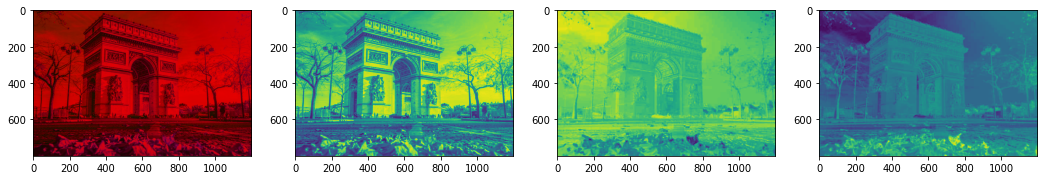

In [97]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18, 10)
fig, ax = plt.subplots(1, 4)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

new_image = np.array(image, dtype='float32')
new_image /= 255

matrix = [
    [0.229, -0.168, 0.500],
    [0.587, -0.331, -0.418],
    [0.114, 0.500, -0.082],
]

new_image = np.dot(new_image, matrix)

Cb_image = new_image[:, :, 1]
Cr_image = new_image[:, :, 2]

scale_percent = 50 
width = int(Cb_image.shape[1] * scale_percent / 100)
height = int(Cb_image.shape[0] * scale_percent / 100)
dim = (width, height)

Cb_image = cv.resize(Cb_image, dim, interpolation = cv.INTER_AREA)
Cr_image = cv.resize(Cr_image, dim, interpolation = cv.INTER_AREA)

scale_percent = 200 
width = int(Cb_image.shape[1] * scale_percent / 100)
height = int(Cb_image.shape[0] * scale_percent / 100)
dim = (width, height)
  

Cb_image = cv.resize(Cb_image, dim, interpolation = cv.INTER_AREA)
Cr_image = cv.resize(Cr_image, dim, interpolation = cv.INTER_AREA)

new_image[:, :, 1] = Cb_image
new_image[:, :, 2] = Cr_image

ax[0].imshow(new_image)
ax[1].imshow(new_image[:, :, 0])
ax[2].imshow(new_image[:, :, 1])
ax[3].imshow(new_image[:, :, 2])

# Zadanie 5

1.0498217776532132e-08
1.4349709993407289e-08


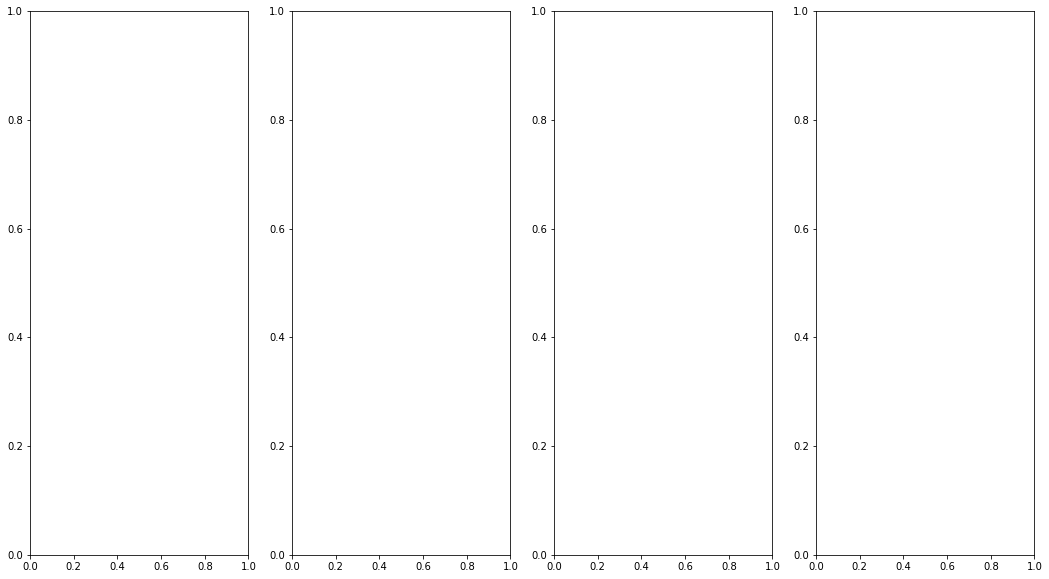

In [107]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (18, 10)
fig, ax = plt.subplots(1, 4)

image = cv.imread("images/example.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

new_image = np.array(image, dtype='float32')
new_image /= 255

matrix = [
    [0.229, -0.168, 0.500],
    [0.587, -0.331, -0.418],
    [0.114, 0.500, -0.082],
]

new_image = np.dot(new_image, matrix)

Cb_image = new_image[:, :, 1]
Cr_image = new_image[:, :, 2]

scale_percent = 50 
width = int(Cb_image.shape[1] * scale_percent / 100)
height = int(Cb_image.shape[0] * scale_percent / 100)
dim = (width, height)

newCb_image = cv.resize(Cb_image, dim, interpolation = cv.INTER_AREA)
newCr_image = cv.resize(Cr_image, dim, interpolation = cv.INTER_AREA)

scale_percent = 200 
width = int(newCb_image.shape[1] * scale_percent / 100)
height = int(newCb_image.shape[0] * scale_percent / 100)
dim = (width, height)
  

newCb_image = cv.resize(newCb_image, dim, interpolation = cv.INTER_AREA)
newCr_image = cv.resize(newCr_image, dim, interpolation = cv.INTER_AREA)

pixels = width * height

mse_Cb = (1 / 3) * (1 / pixels)
mse_Cr = (1 / 3) * (1 / pixels)

tmp_Cb = 0
tmp_Cr = 0



for i in range(3):
    for j in range(len(newCb_image[i])):
        tmp_Cb += (Cb_image[i][j] - newCb_image[i][j]) * (Cb_image[i][j] - newCb_image[i][j])
        tmp_Cr += (Cr_image[i][j] - newCr_image[i][j]) * (Cr_image[i][j] - newCr_image[i][j])
        
mse_Cb *= tmp_Cb
mse_Cr *= tmp_Cr

print(mse_Cb)
print(mse_Cr)